> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **##**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

*‘ScheduledDay’ tells us on what day the patient set up their appointment.

*‘Neighborhood’ indicates the location of the hospital.

*‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

*‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### The Question of interest 

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
   
   To answer this question we have to explore the relation between showing Up and other factors
   
* what is the proportion of showing up to Not showing up   

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
# import stats functions from scipy
from scipy import stats

# imports for better control of output and plots
from IPython.display import display

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There are some mistakes in column names

In [4]:
# types and look for instances of missing or possibly errant data.
# checking Data entry errors like (data types, null values ...)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no null value and some data type errors

In [5]:
# check if there is a dplicates in the data 
print("Num of dublicated : ", + sum(df.duplicated()))


Num of dublicated :  0


#### Explore the whole dataset to find odd valuse from excel file

            I found that there is values that equal to Zero in the age column

### Data Cleaning 
#### 1 correct column names

In [6]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicapped','No-show':'NoShow'}, inplace = True)

In [7]:
## Remove zero values in age column with the mean 

df = df[df.Age != 0]

In [8]:
## convert data type of ScheduledDay and AppointmentDay into datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (what is the proportion of showing up to Not showing up)

In [9]:
df.NoShow.value_counts()

No     85308
Yes    21680
Name: NoShow, dtype: int64

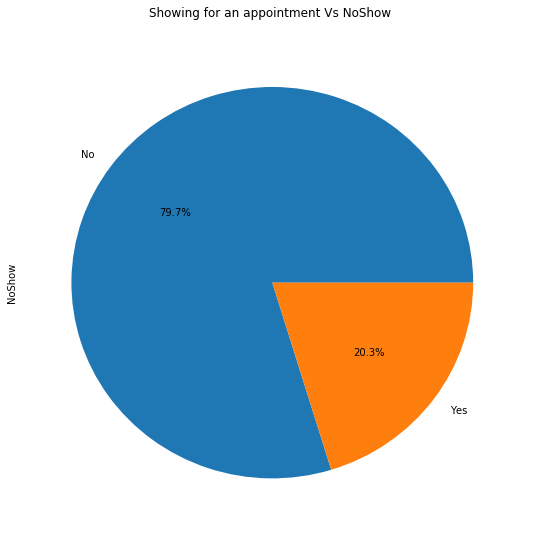

In [10]:
df.NoShow.value_counts().plot(kind="pie",figsize=(9,9), autopct='%1.1f%%').set_title("Showing for an appointment Vs NoShow \n");


### Research Question 2  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment)

In [11]:
df_yes= df[df.NoShow == "Yes"]
df_yes= df.query('NoShow == "Yes"')
df_yes.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,NoShow
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [12]:
df_no= df[df.NoShow == "No"]
df_no= df.query('NoShow == "No"')
df_no.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df_yes.Age.mean()


35.329151291512915

In [14]:
showed = df['NoShow'] == 0
not_showed = df['NoShow'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

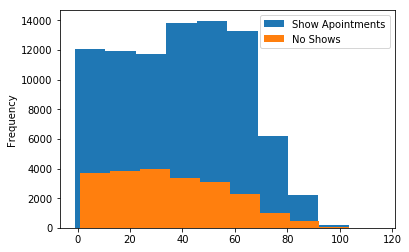

Show Appointments Mean Age:39.07
Missed Appointments Mean Age:35.33


In [15]:
Show = (df.NoShow == 'No')
noshows = (df.NoShow == 'Yes')

df[Show].Age.plot.hist()
df[noshows].Age.plot.hist()
plt.legend(['Show Apointments', 'No Shows'])
plt.show()
print('Show Appointments Mean Age:{:.2f}'.format(df[Show].Age.mean()))
print('Missed Appointments Mean Age:{:.2f}'.format(df[noshows].Age.mean()))

This histogram overlays the distributions of Showed appointments and no shows so that they can be compared. The peak near 50 years is much smaller for no shows. The mean is also lower but is not apparent with a histogram. Box plots provide a better visualization for interpreting the difference in means.



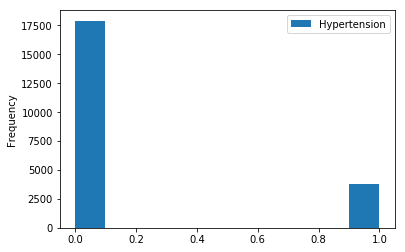

In [16]:
df_yes.plot(x="Age", y="Hypertension", kind= 'hist');

In [17]:
df_yes.Age.mean()


35.329151291512915

In [18]:
df_no.Age.mean()


39.074717494256106

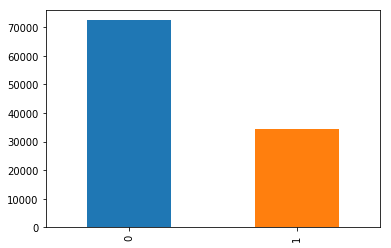

In [19]:
df.SMS_received.value_counts().plot(kind= 'bar')

Only 30% had been SMS notified


In [20]:
df_yes.SMS_received.value_counts()

0    12112
1     9568
Name: SMS_received, dtype: int64

In [21]:
df_no.SMS_received.value_counts()

0    60291
1    25017
Name: SMS_received, dtype: int64

Gender
F    False
M    False
Name: showed, dtype: bool


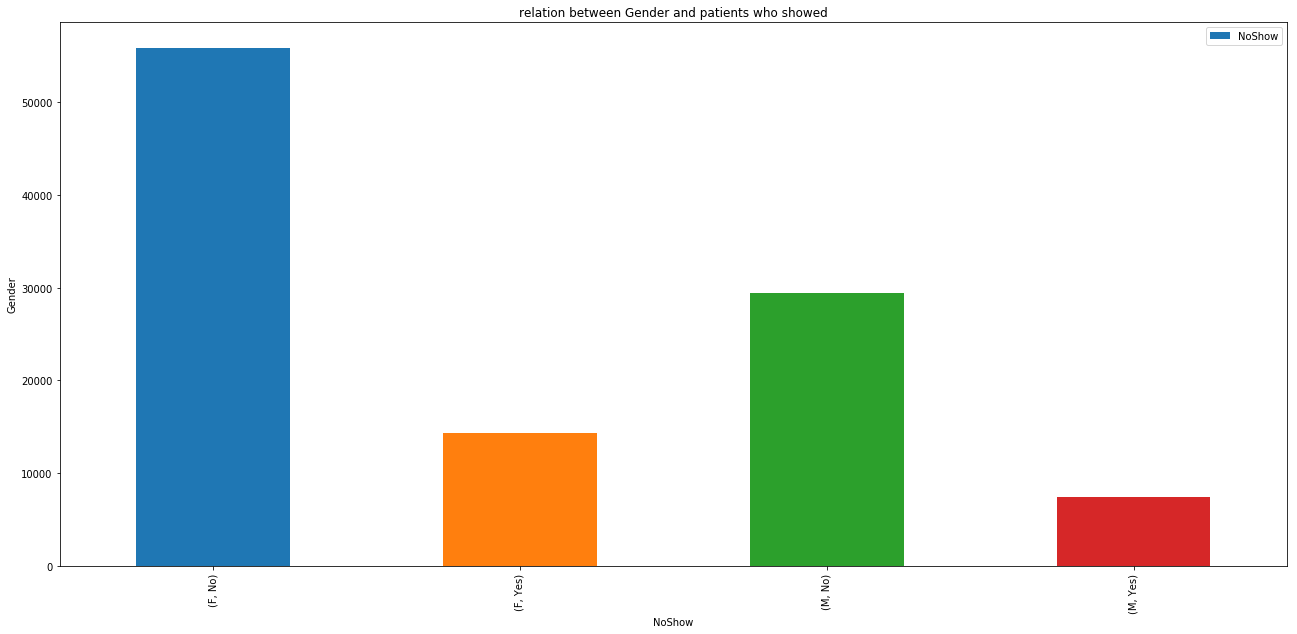

In [22]:
 # and then see the relation between Gender and people who showed up and who didn't

print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['NoShow'].value_counts().plot(kind='bar',figsize=(22,10));
plt.xlabel("NoShow")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions
The analysis confirmed that several variables were correlated with No Shows. There was a small but statistically significant difference in average age between patients who missed their appointments and those who did not.

One limitation of this analysis was the lack of background information. In the initial analysis of the data it was found that only 32% of the appointments had SMS messages received. It is possible that patients were more likely to be encouraged to enroll in SMS notifications after they have already missed an appointment. That would mean that those who were receiving SMSes were also more likely to have problems making appointments.
also there is a noticable relation according to gender as we can see in the table above

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0